In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

# Basic Check

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
data.drop(['date', 'country','street', 'statezip'], axis=1, inplace=True)

In [6]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 4600
Number of columns: 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.2+ KB


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
data.describe(include = 'O')

,city
count,4600
unique,44
top,Seattle
freq,1573


In [10]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
dtype: int64

In [11]:
print(data.isnull().sum() / len(data) * 100)

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
city             0.0
dtype: float64


# EDA

### Univarient analysis 

In [12]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

In [13]:
data1 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']]
data2 = data[['city']]

## For Numerical Columns

### doesn't support hue with continuous variables like price

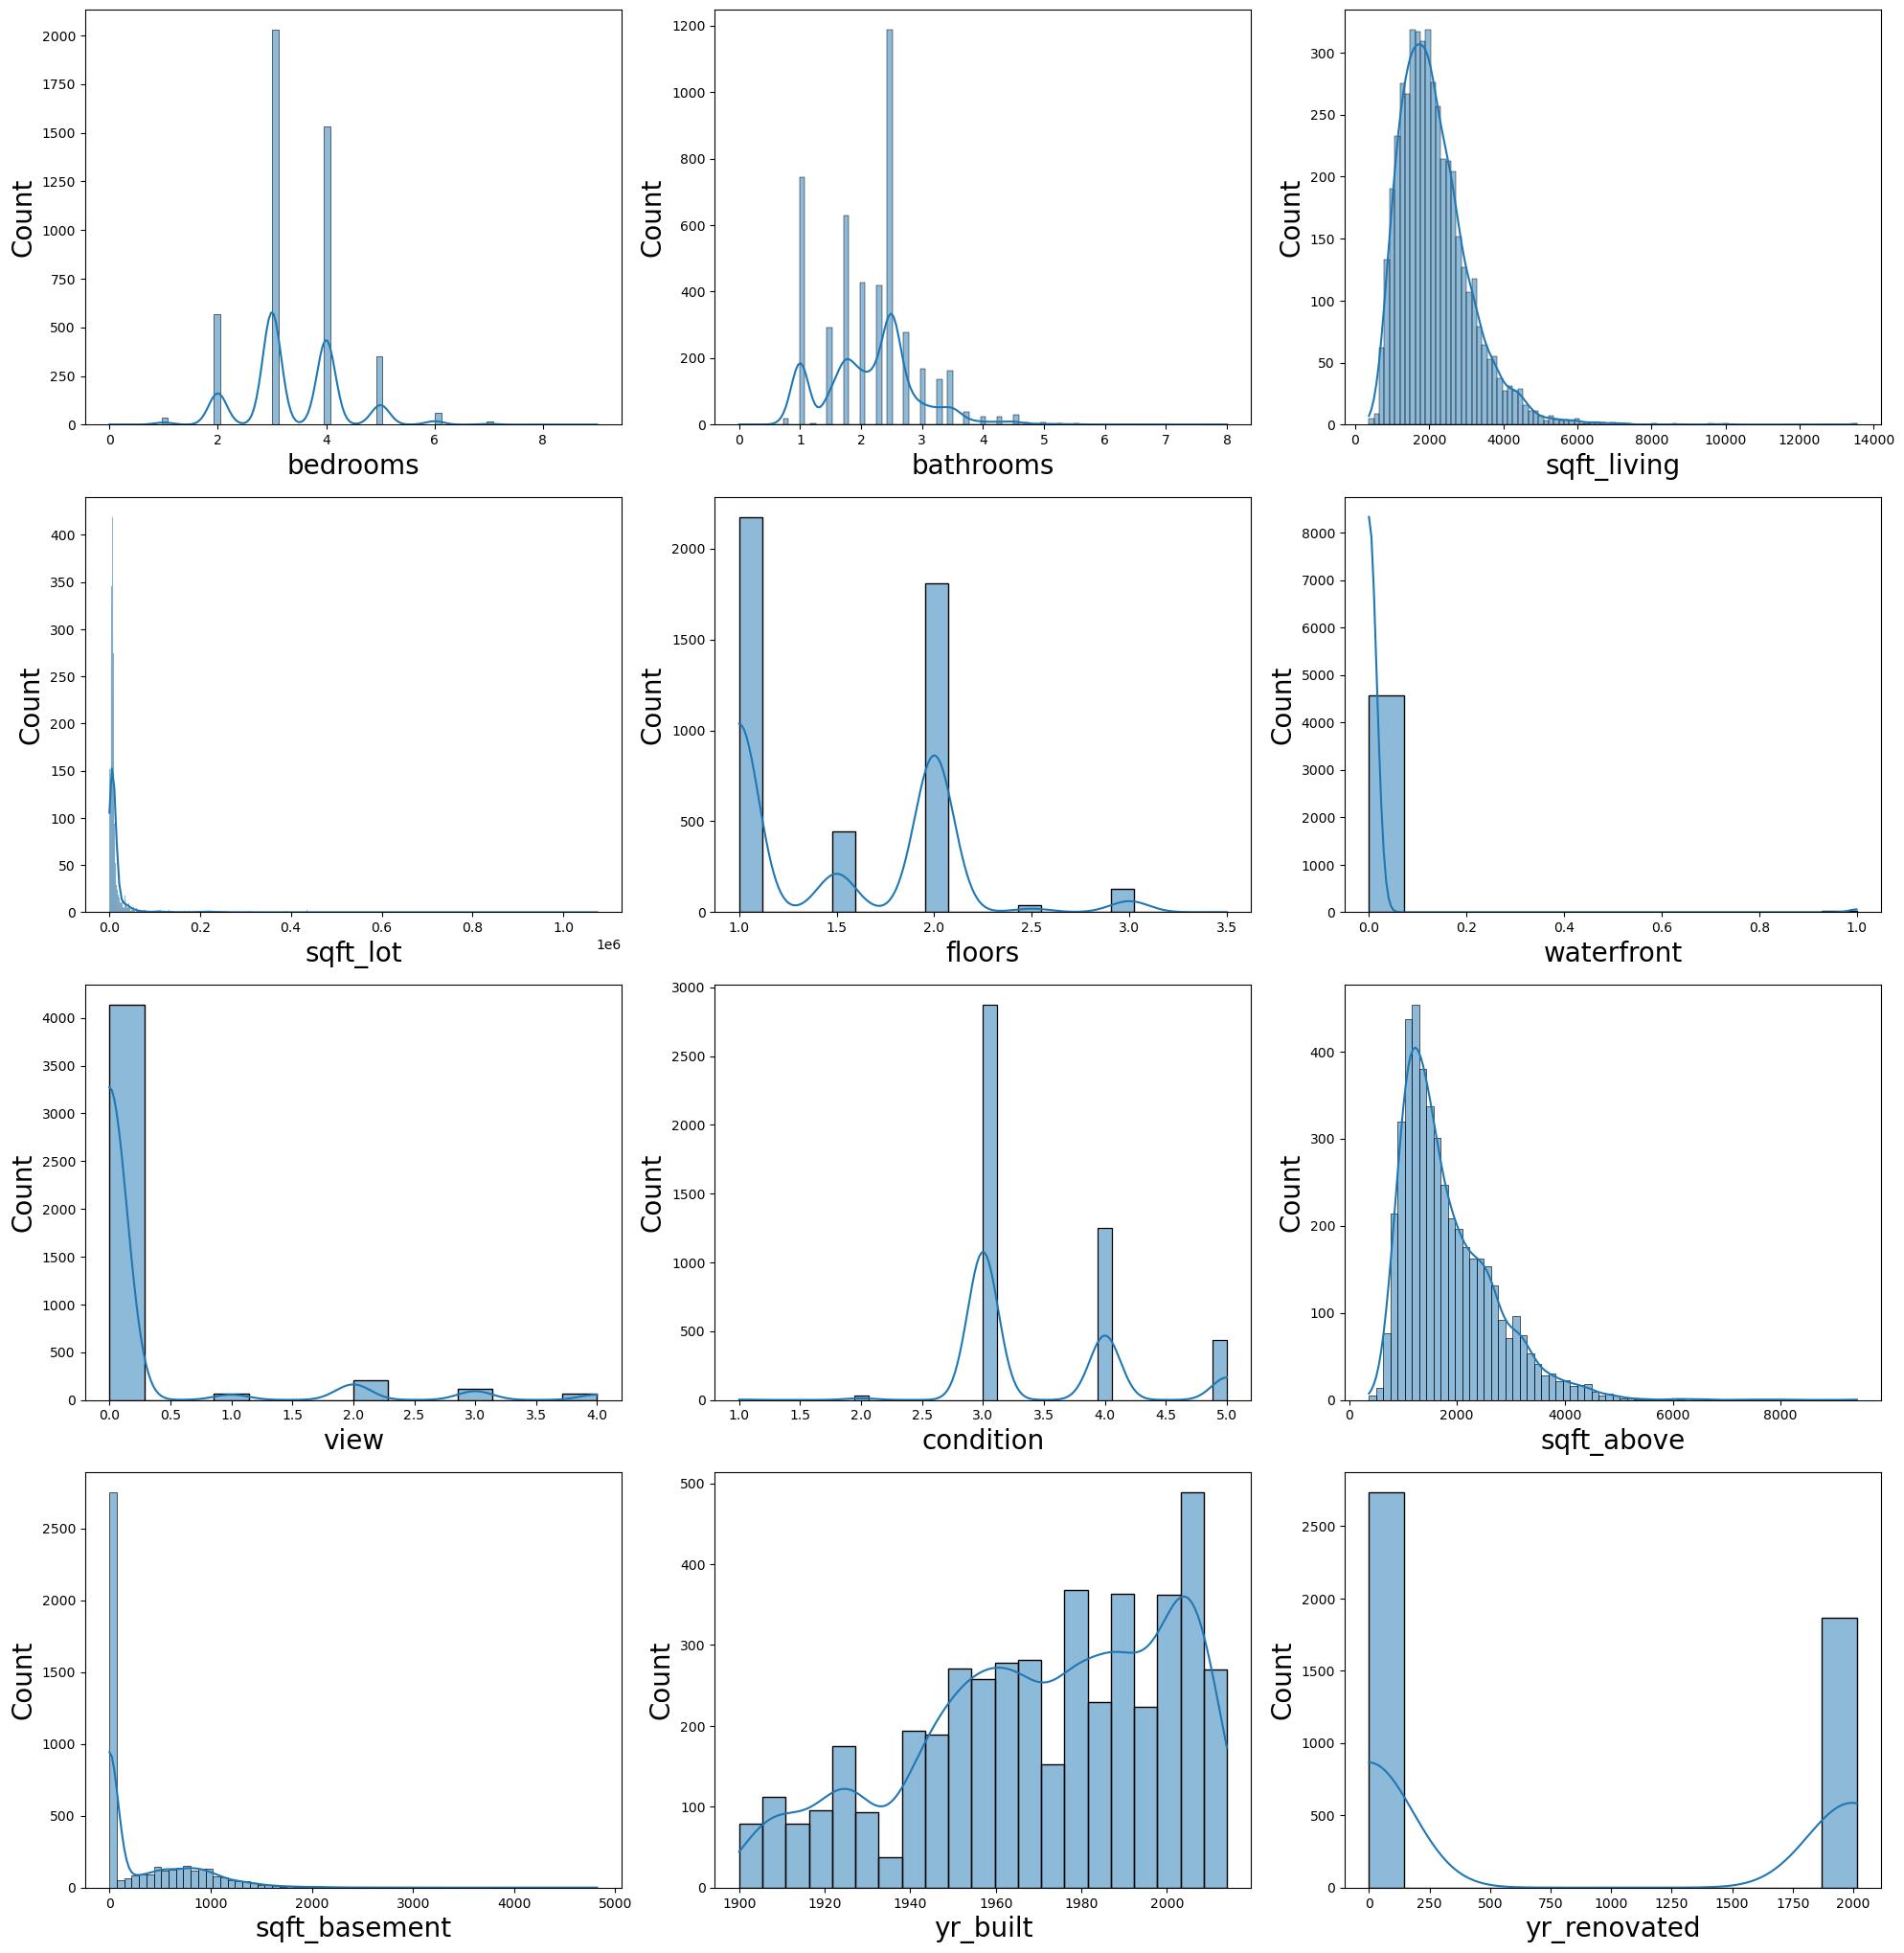

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(data1[column], kde=True)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count', fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

## Boxplot 

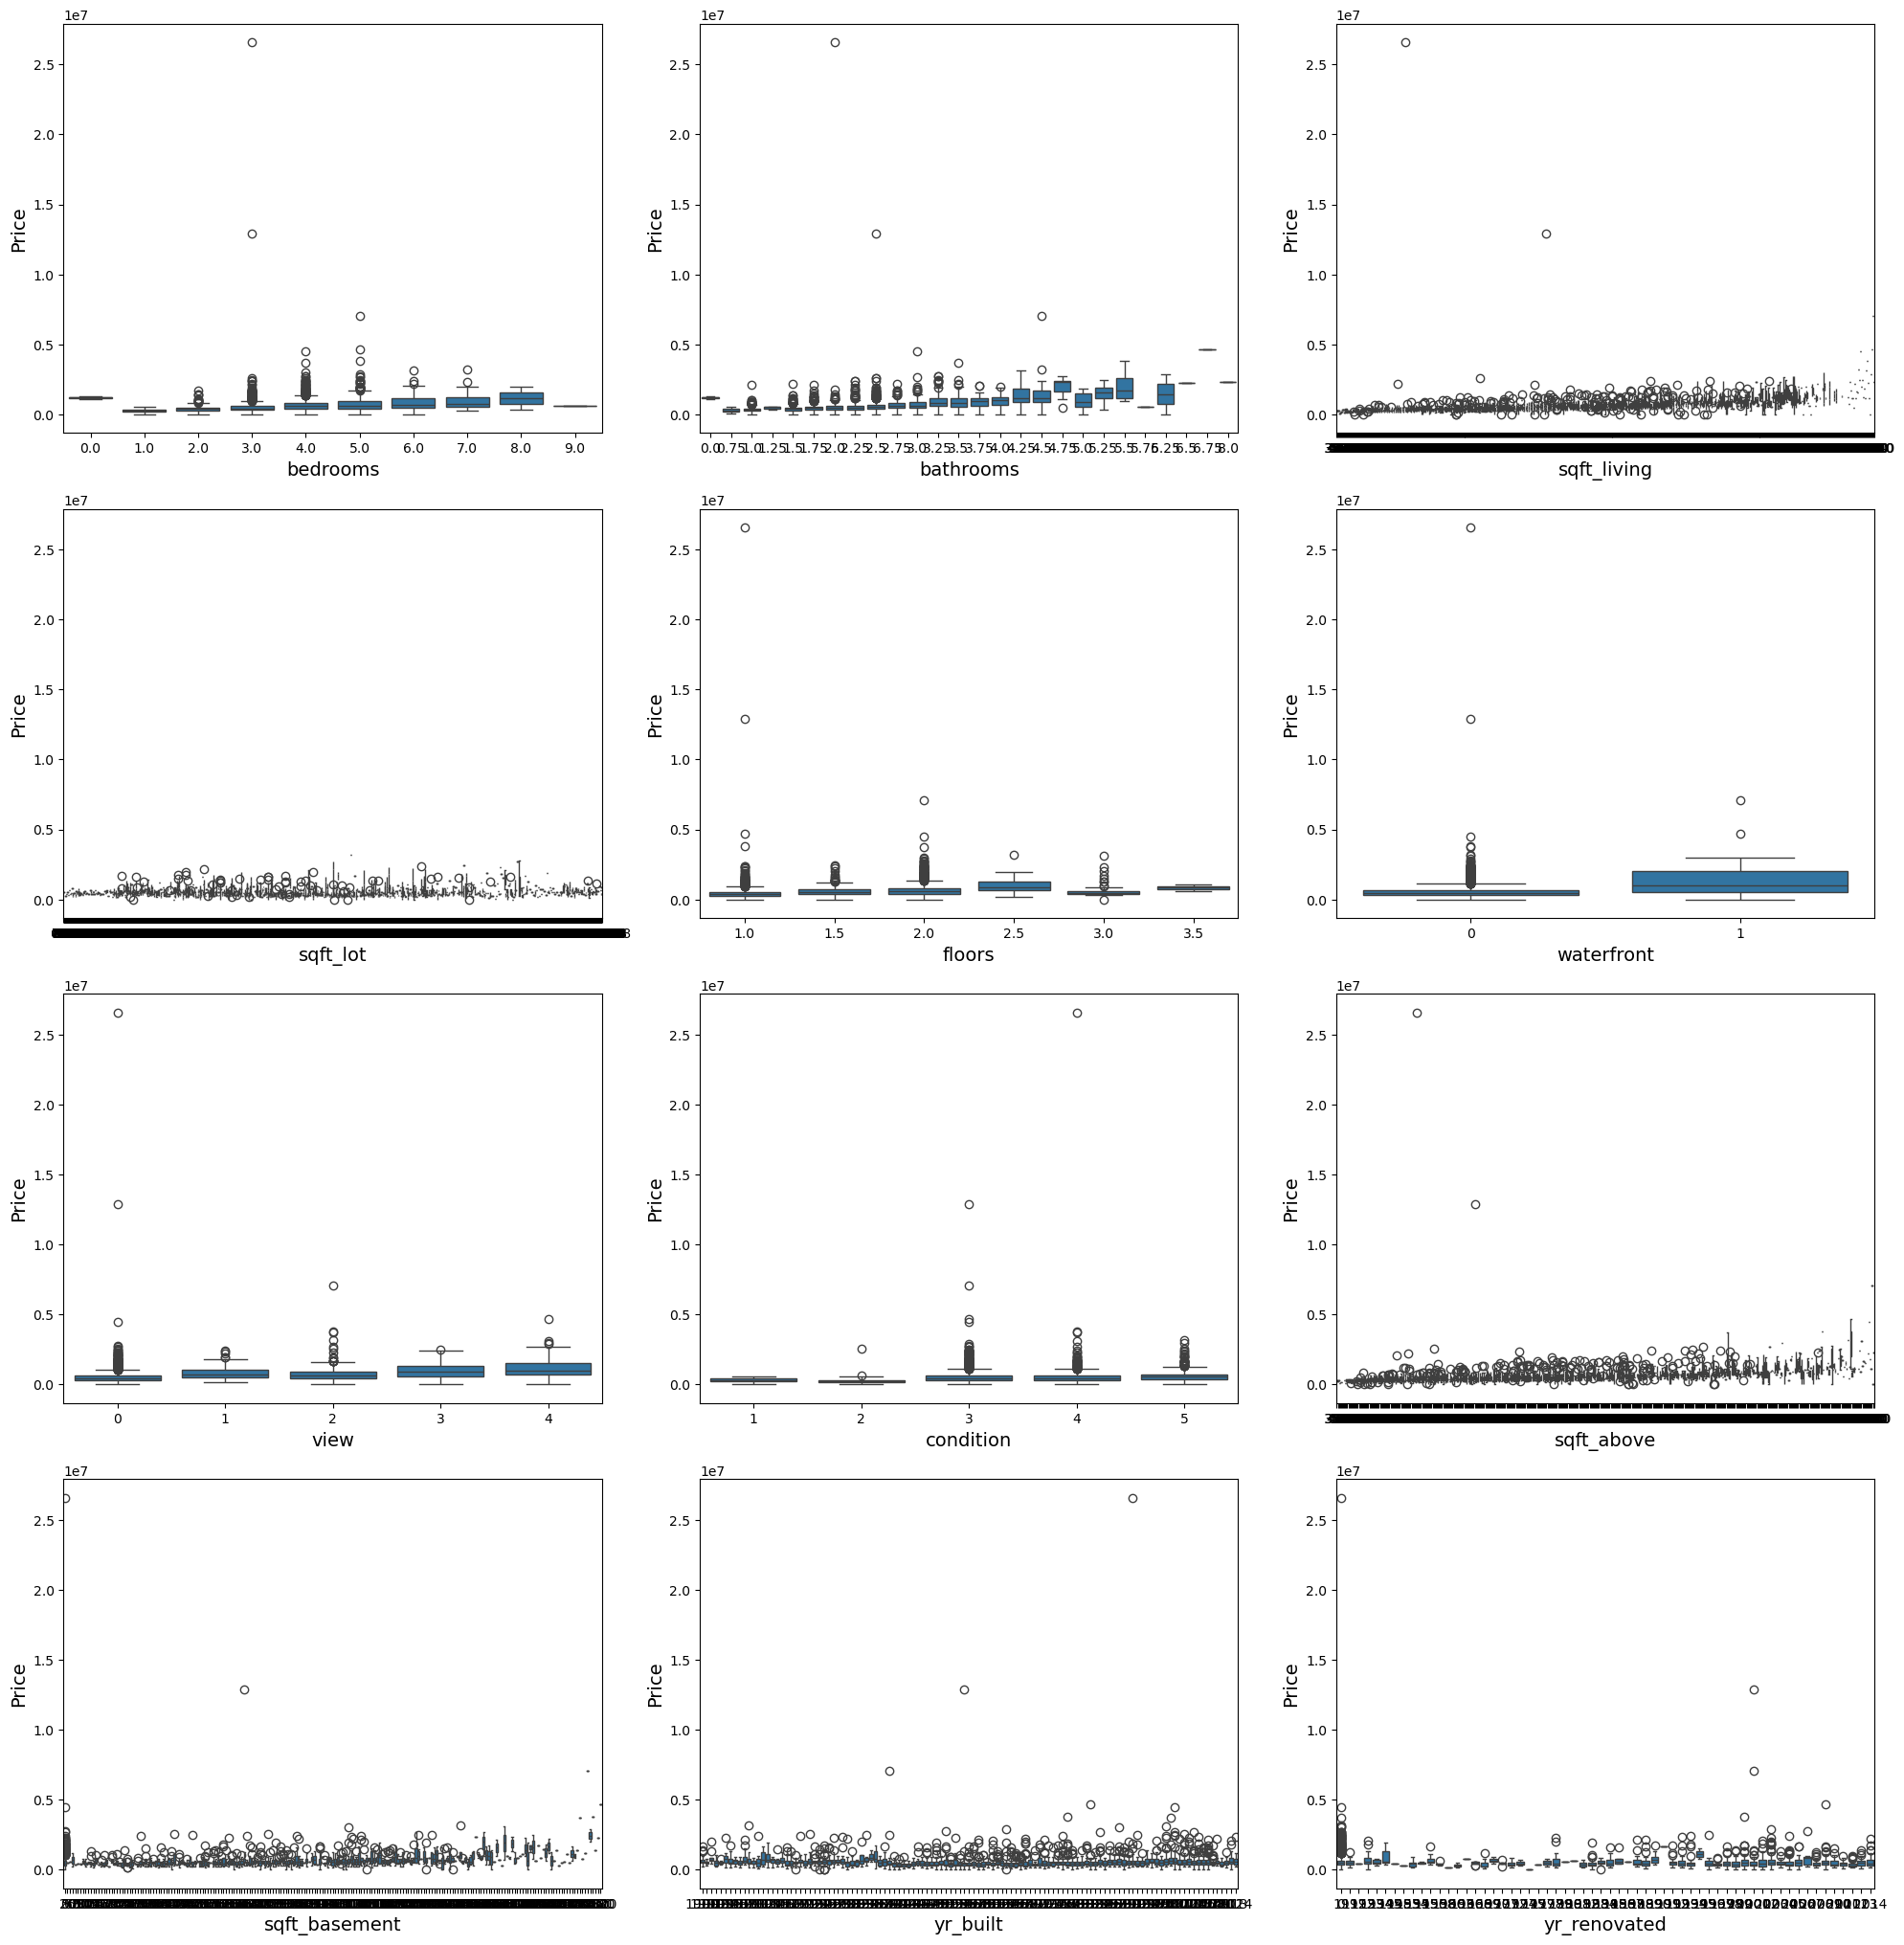

In [15]:

# Create boxplots
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data1.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.boxplot(x=data[column], y=data['price'])
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plotnumber += 1

plt.tight_layout()
plt.show()


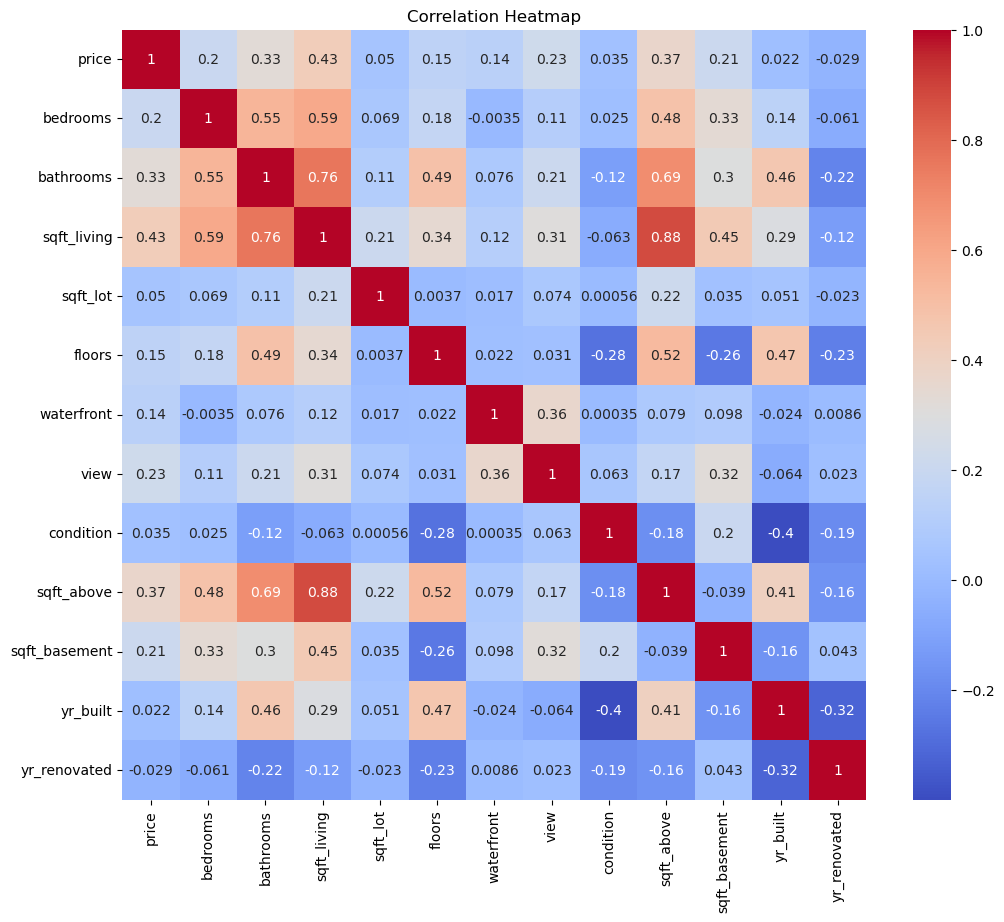

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
correlations = data.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlations)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


In [18]:
data.drop(columns=['sqft_lot', 'condition', 'yr_built', 'yr_renovated'], inplace=True)

# Data Preprocessing

In [19]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
city             0
dtype: int64

### 2. Outliers

In [20]:
import math

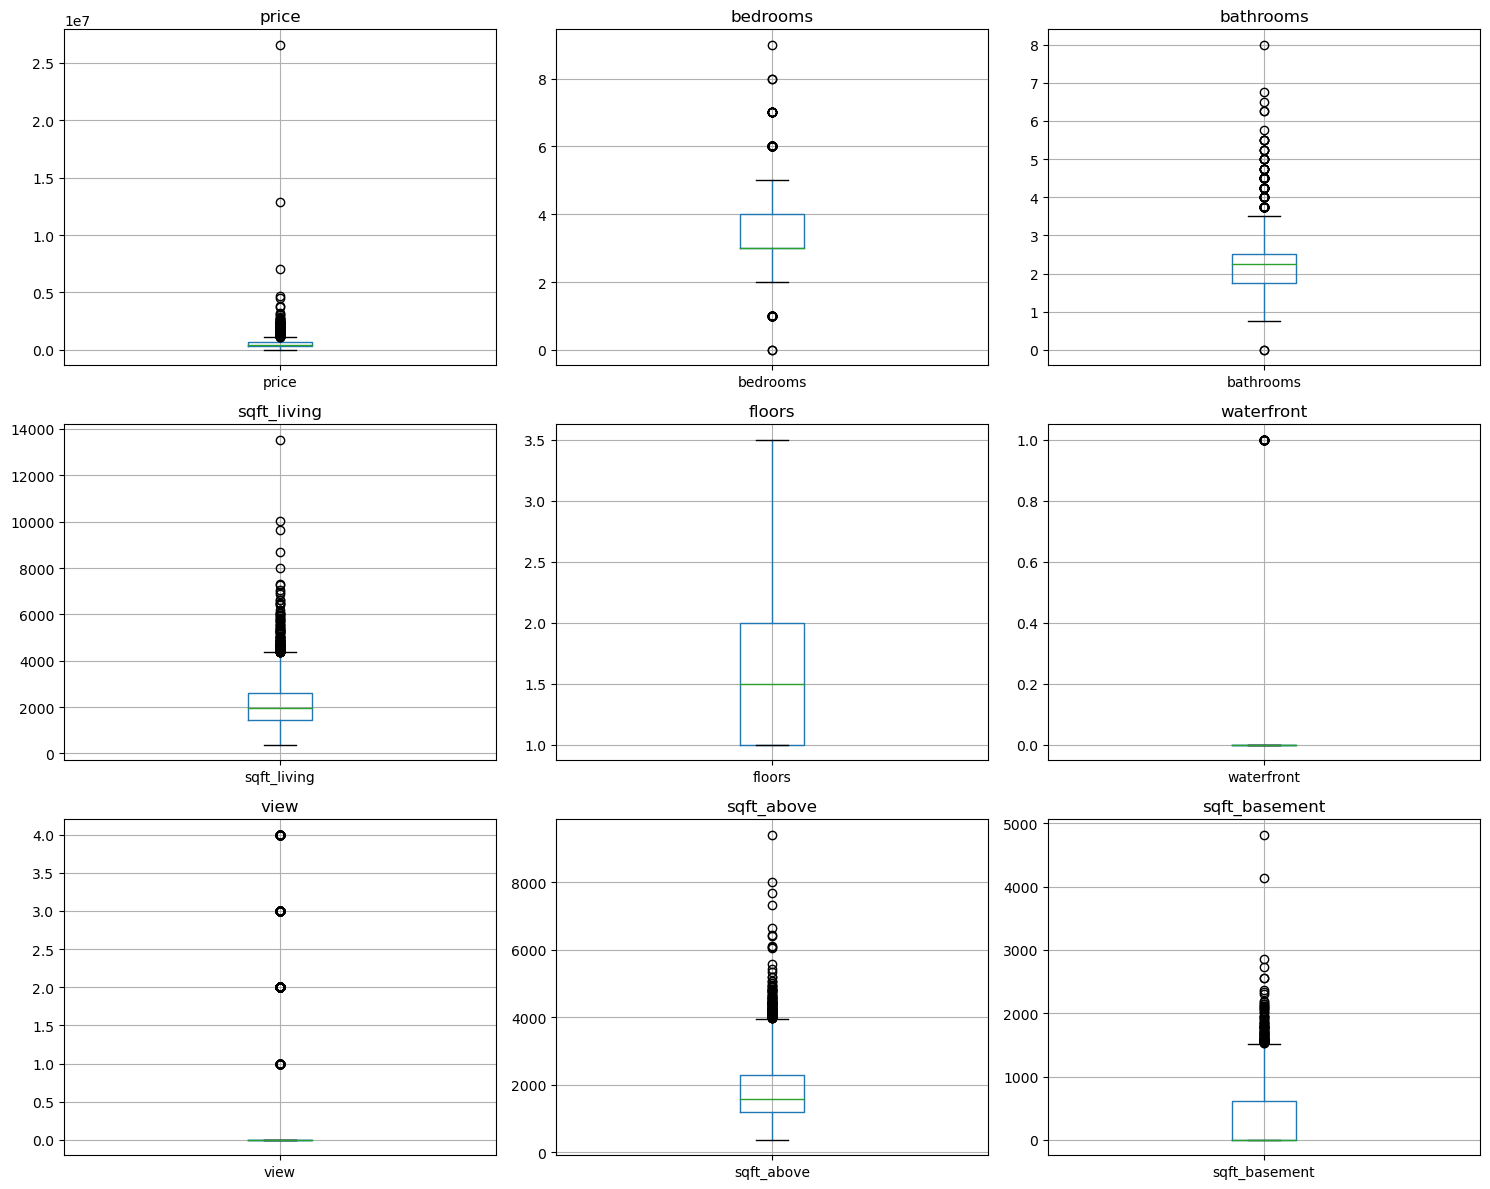

In [21]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=["number"]).columns

# Calculate number of rows and columns for subplots
n_cols = 3  # You can change this (e.g., 4 for wider layout)
n_plots = len(numeric_cols)
n_rows = math.ceil(n_plots / n_cols)

# Create boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Turn off any extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


price: 240 outliers


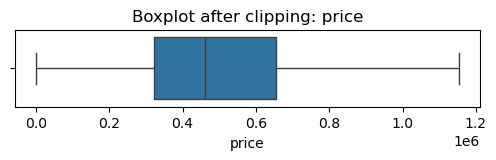

bedrooms: 118 outliers


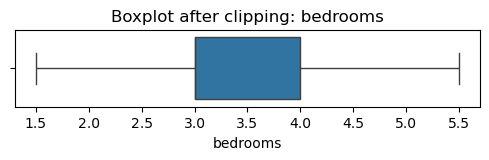

bathrooms: 141 outliers


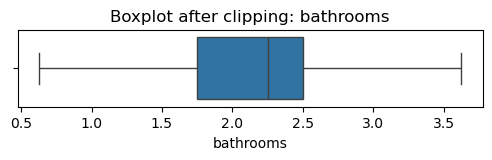

sqft_living: 129 outliers


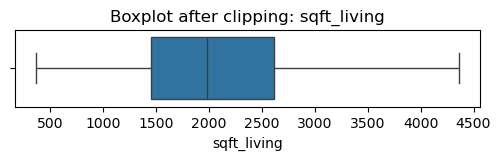

floors: 0 outliers


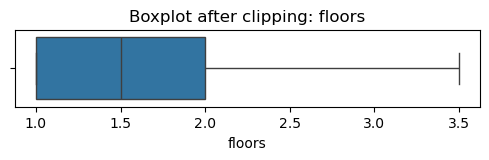

waterfront: 33 outliers


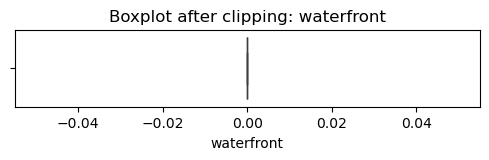

view: 460 outliers


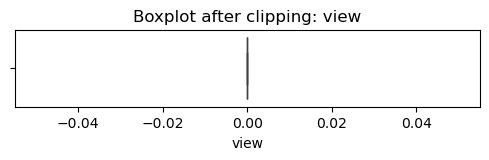

sqft_above: 116 outliers


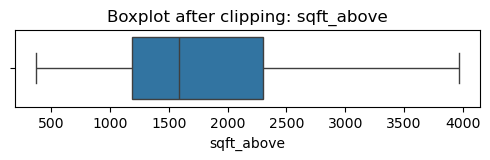

sqft_basement: 82 outliers


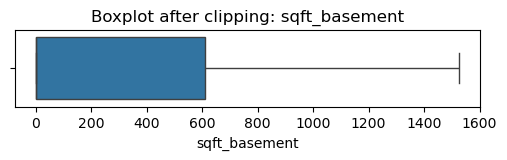

In [22]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Loop over each column and apply IQR outlier handling
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

    # Clip outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

    # Optional: Show boxplot
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot after clipping: {col}')
    plt.show()

Number of outliers in 'price': 0


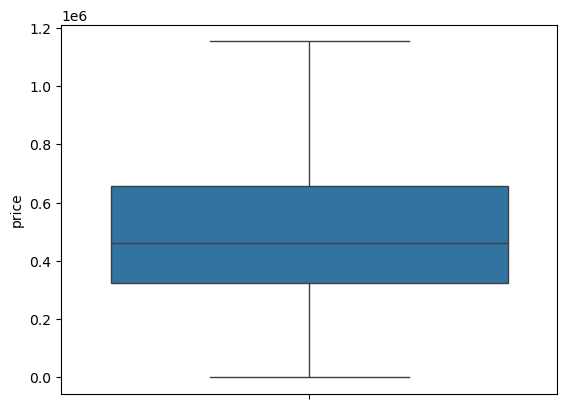

In [23]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
print(f"Number of outliers in 'price': {outliers.shape[0]}")

# Handling outliers
data['price'] = data['price'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data=data,y="price")
plt.show()

# Encoding

In [24]:
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city
0,3.130000e+05,3.0,1.50,1340,1.5,0,0,1340,0,Shoreline
1,1.153094e+06,5.0,2.50,3650,2.0,0,0,3370,280,Seattle
2,3.420000e+05,3.0,2.00,1930,1.0,0,0,1930,0,Kent
3,4.200000e+05,3.0,2.25,2000,1.0,0,0,1000,1000,Bellevue
4,5.500000e+05,4.0,2.50,1940,1.0,0,0,1140,800,Redmond
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,1.0,0,0,1510,0,Seattle
4596,5.343333e+05,3.0,2.50,1460,2.0,0,0,1460,0,Bellevue
4597,4.169042e+05,3.0,2.50,3010,2.0,0,0,3010,0,Renton
4598,2.034000e+05,4.0,2.00,2090,1.0,0,0,1070,1020,Seattle


In [25]:
data.describe(include='O')

,city
count,4600
unique,44
top,Seattle
freq,1573


In [26]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'sqft_above', 'sqft_basement', 'city'],
      dtype='object')

In [ ]:
data = pd.get_dummies(data, columns=['city'], drop_first=True)

In [ ]:
data

# Model Creation

In [ ]:
X = data.drop(columns=['price'])  # Features
y = data['price']                 # Target

In [ ]:
y

In [ ]:
X

In [ ]:
# Step 2: Training and testing data creation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 0.25 = 25%

In [ ]:
X_test

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("Linear Regression Evaluation:")

# R² Score
print("R² Score:", r2_score(y_test, y_pred_lr))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# MAE
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)  # No need to scale for tree-based models

y_pred_rf = rf.predict(X_test)

print("Random Forest Evaluation:")

# R² Score
print("R² Score:", r2_score(y_test, y_pred_rf))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# MAE
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [ ]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)


In [ ]:
best_rf = grid_search.best_estimator_

y_pred_rf_best = best_rf.predict(X_test)

print("Tuned Random Forest Evaluation:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_rf_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_best)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_best))


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Instantiate and fit the model
xgb = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
xgb.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print("XGBoost Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

In [ ]:
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("Tuned XGBoost Evaluation:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_best_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_best_xgb))